In [8]:
# Imports & Packages
import numpy as np
import pandas as pd
import os
import re
from tqdm import tqdm
import plotly.graph_objects as go

import time, random
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.max_columns', None)

print("Current working directory: ", os.getcwd())

data = pd.read_excel("C:/Users/VladislavManolo/project/historical_MOIC_data_FINAL.xlsx")

print(len(data))
data.head(2)

Current working directory:  C:\Users\VladislavManolo\project
1535


,FUND ID,FUND NAME,ASSET CLASS,VINTAGE,STRATEGY,STATUS,FUND MANAGER ID,FUND MANAGER,CQ12000,CQ22000,CQ32000,CQ42000,CQ12001,CQ22001,CQ32001,CQ42001,CQ12002,CQ22002,CQ32002,CQ42002,CQ12003,CQ22003,CQ32003,CQ42003,CQ12004,CQ22004,CQ32004,CQ42004,CQ12005,CQ22005,CQ32005,CQ42005,CQ12006,CQ22006,CQ32006,CQ42006,CQ12007,CQ22007,CQ32007,CQ42007,CQ12008,CQ22008,CQ32008,CQ42008,CQ12009,CQ22009,CQ32009,CQ42009,CQ12010,CQ22010,CQ32010,CQ42010,CQ12011,CQ22011,CQ32011,CQ42011,CQ12012,CQ22012,CQ32012,CQ42012,CQ12013,CQ22013,CQ32013,CQ42013,CQ12014,CQ22014,CQ32014,CQ42014,CQ12015,CQ22015,CQ32015,CQ42015,CQ12016,CQ22016,CQ32016,CQ42016,CQ12017,CQ22017,CQ32017,CQ42017,CQ12018,CQ22018,CQ32018,CQ42018,CQ12019,CQ22019,CQ32019,CQ42019
0,3217,AM Pappas Life Science Ventures II,Venture Capital,2000,Venture (General),Liquidated,2198,Pappas Capital,NaN,NaN,NaN,0.46,0.83,0.88,0.85,0.82,0.85,0.86,0.86,0.81,0.73,0.770,0.79,0.73,0.76,0.82,0.81,0.75,0.93,0.94,0.880,0.88,0.87,0.86,0.87,1.03,1.03,1.03,1.02,1.02,1.01,0.96,0.94,0.88,0.87,0.88,0.88,0.87,0.880,0.92,0.92,0.93,1.25,1.26,1.27,1.25,1.25,1.25,1.25,1.24,1.24,1.22,1.20,1.19,1.19,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20,1.20
1,58,Accel VIII,Venture Capital,2000,Venture (General),Liquidated,14,Accel,NaN,1.10,1.07,1.03,0.93,0.82,0.79,0.70,0.68,0.72,0.56,0.52,0.51,0.530,0.55,0.53,0.51,0.57,0.55,0.58,0.56,0.68,0.670,0.68,0.81,0.84,0.96,1.07,0.95,1.20,1.19,1.21,1.25,1.25,1.19,1.16,1.16,1.16,1.24,1.22,0.865,0.51,0.57,0.55,1.19,1.22,1.21,1.28,1.32,1.29,1.31,1.29,1.29,1.30,1.27,1.27,1.30,1.32,1.32,1.31,1.31,1.31,1.32,1.33,1.33,1.35,1.35,1.36,1.36,1.36,1.38,1.39,1.42,1.43,1.45,1.44,1.44,1.44,1.44,1.44
2,98151,Access Ventures Fund,Venture Capital,2000,Expansion / Late Stage,Liquidated,58261,Mutual Capital Partners,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.12
3,75,Advanced Tech Ventures VI,Venture Capital,2000,Venture (General),Liquidated,21,Advanced Technology Ventures,0.87,0.94,0.91,0.96,0.98,0.97,0.83,0.82,0.84,0.66,0.50,0.49,0.46,0.445,0.43,0.37,0.46,0.36,0.27,0.24,0.26,0.23,0.250,0.24,0.24,0.22,0.23,0.23,0.23,0.23,0.25,0.25,0.23,0.22,0.22,0.18,0.18,0.17,0.17,0.17,0.370,0.46,0.36,0.27,0.43,0.43,0.45,0.44,0.44,0.45,0.45,0.45,0.45,0.45,0.45,0.47,0.47,0.47,0.46,0.47,0.47,0.47,0.46,0.46,0.47,0.47,0.47,0.47,0.47,0.47,0.47,0.47,0.47,0.47,0.47,0.47,0.46,0.46,0.46,0.46
4,130,Alloy Ventures 2000,Venture Capital,2000,Early Stage: Seed,Liquidated,34,Alloy Ventures,NaN,0.93,0.94,1.16,1.13,1.14,1.01,1.00,1.05,1.04,1.02,1.00,0.91,0.870,0.83,0.83,0.91,0.71,0.68,0.66,0.65,0.64,0.655,0.67,0.68,0.66,0.63,0.59,0.59,0.61,0.64,0.64,0.65,0.59,0.58,0.52,0.52,0.52,0.52,0.53,0.830,0.91,0.71,0.68,0.50,0.50,0.49,0.47,0.46,0.47,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38


In [35]:
# Calculate the mean and covariance of returns
mean_returns = 1 + returns.mean() **4 - 1
cov_matrix = returns.cov() * 4

np.random.seed(42) # Set the random seed for reproducibility
num_portfolios = 1000 # Number of portfolios to simulate

# Initialize arrays to store portfolio performance metrics
results = np.zeros((4, num_portfolios))
risk_free_rate = 0.05

for i in range(num_portfolios):
    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)

    # Expected portfolio return
    portfolio_return = np.sum(weights * mean_returns) 

    # Expected portfolio volatility
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Portfolio Sharpe ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev

    results[0,i] = portfolio_return
    results[1,i] = portfolio_stddev
    results[2,i] = sharpe_ratio
    results[3,i] = weights.sum()

# Convert results array to DataFrame
columns = ['Return', 'Volatility', 'Sharpe Ratio', 'Weighted Sum']
portfolios = pd.DataFrame(results.T, columns=columns)

# Locate the portfolio with the maximum Sharpe ratio
max_sharpe_portfolio = portfolios.iloc[portfolios['Sharpe Ratio'].idxmax()]

# Locate the portfolio with the minimum volatility
min_volatility_portfolio = portfolios.iloc[portfolios['Volatility'].idxmin()]

# Display the efficient frontier
print("Maximum Sharpe Ratio Portfolio:")
print(max_sharpe_portfolio)

print("\nMinimum Volatility Portfolio:")
print(min_volatility_portfolio)

fig = go.Figure()

# Scatter plot for individual portfolios
fig.add_trace(go.Scatter(
    x=portfolios['Volatility'],
    y=portfolios['Return'],
    mode='markers',
    marker=dict(
        size=10,
        color=portfolios['Sharpe Ratio'],
        colorscale='RdBu',
        showscale=True,
        line=dict(width=1),
        colorbar=dict(title='Sharpe Ratio')
    ),
    text=portfolios['Sharpe Ratio'].round(2),
    name='Portfolios'
))

# Highlight the maximum Sharpe ratio portfolio
fig.add_trace(go.Scatter(
    x=[max_sharpe_portfolio['Volatility']],
    y=[max_sharpe_portfolio['Return']],
    mode='markers',
    marker=dict(size=12, color='red', symbol='star'),
    text=['Max Sharpe Ratio'],
    name='Max Sharpe Ratio'
))

# Highlight the minimum volatility portfolio
fig.add_trace(go.Scatter(
    x=[min_volatility_portfolio['Volatility']],
    y=[min_volatility_portfolio['Return']],
    mode='markers',
    marker=dict(size=12, color='blue', symbol='star'),
    text=['Min Volatility'],
    name='Min Volatility'
))

# Update layout for better visualization
fig.update_layout(
    template='plotly_white',
    title='Efficient Frontier with Monte Carlo Simulations',
    xaxis=dict(title='Annualized Risk (Volatility)'),
    yaxis=dict(title='Annualized Return'),
    width=850,
    height=500,
    legend=dict(
        x=1.02,
        y=1.2,
        traceorder='normal',
        orientation='v'
    )
)

Maximum Sharpe Ratio Portfolio:
Return          1.971327
Volatility      0.925708
Sharpe Ratio    2.075521
Weighted Sum    1.000000
Name: 390, dtype: float64

Minimum Volatility Portfolio:
Return          1.465711
Volatility      0.741409
Sharpe Ratio    1.909487
Weighted Sum    1.000000
Name: 634, dtype: float64


In [17]:
returns = data.iloc[:, 8:] # MOIC data
mus = (1 + returns.mean())**4 - 1 # -- Get annualized mean returns
cov = returns.cov() # -- Get covariances
n_assets = 20  # 20 funds per portfolio
n_portfolios = 1000
risk_free_rate = 0.05

# -- Initialize empty lists to store mean-variance pairs and returns for plotting
mean_variance_pairs = []
portfolio_returns = []

np.random.seed(2)
for _ in range(n_portfolios):
    assets = np.random.choice(returns.columns, n_assets, replace = False)         # - Choose assets randomly without replacement
    weights = np.random.rand(n_assets)
    weights /= sum(weights)                                                     # - Ensure weights sum to 1
    # -- Compute portfolio return and variance
    portfolio_E_Return = np.sum(weights * mus[assets])
    portfolio_E_Variance = np.dot(weights, np.dot(cov.loc[assets, assets], weights))
    
    annualized_return = ((1 + portfolio_E_Return) ** (1/4) - 1)               # -- Calculate annualized return (DONT DIVIDE BY 100 BECAUSE IT IS NOT %)
    
    annualized_volatility = np.sqrt(portfolio_E_Variance) * np.sqrt(4)          # -- Calculate annualized volatility

    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility # -- Calculate Sharpe ratio

    # -- Add the mean/variance/Shapre ratio triples to a list for plotting
    mean_variance_pairs.append([annualized_return, annualized_volatility, sharpe_ratio])
    
    # -- Append the annualized return to the list of portfolio returns
    portfolio_returns.append(annualized_return)

# -- Convert the lists from before into arrays for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)
portfolio_returns = np.array(portfolio_returns)
overall_median_return = np.median(np.array(mean_variance_pairs)[:, 0])

fig = go.Figure()
fig.add_trace(go.Scatter(x = mean_variance_pairs[:, 1], y = mean_variance_pairs[:, 0],
                         marker = dict(color=(mean_variance_pairs[:, 0]) /
                                       (mean_variance_pairs[:, 1]), showscale = True, size = 7, line = dict(width = 1), colorscale = "RdBu",
                                     colorbar=dict(title="Sharpe<br>Ratio")), mode='markers'))
fig.update_layout(template = 'plotly_white',
                  xaxis = dict(title = 'Annualized Risk (Volatility)'),
                  yaxis = dict(title = 'Annualized Return'),
                  title ='Sample of Random Portfolios', width = 850, height = 500)
fig.update_layout(coloraxis_colorbar = dict(title="Sharpe Ratio"))
fig.show()

In [2]:
def detect_emerging_fund_managers(text):
    return text.endswith(' I') or text.endswith(' II') or text.endswith (' 1') or text.endswith (' 2') or text.endswith (' One') or text.endswith (' Two') or text.endswith ('No.1') or text.endswith ('No.2')

def detect_developing_fund_managers(text):
    return text.endswith(' III') or text.endswith(' IV') or text.endswith(' 3') or text.endswith(' 4') or text.endswith ('No.3') or text.endswith ('No.4')

def detect_established_fund_managers(text):
    return text.endswith(' V') or text.endswith(' VI') or text.endswith(' VII') or text.endswith(' VIII') or text.endswith(' IX') or text.endswith(' X') or text.endswith (' 5') or text.endswith (' 6') or text.endswith ('No.5') or text.endswith ('No.6')

emerging_fms_historical = historical_MOIC_data[historical_MOIC_data.groupby('FUND MANAGER')['FUND NAME'].transform('count').between(1, 2)].copy()
developing_fms_historical = historical_MOIC_data[historical_MOIC_data.groupby('FUND MANAGER')['FUND NAME'].transform('count').between(3, 4)].copy()
established_fms_historical = historical_MOIC_data[historical_MOIC_data.groupby('FUND MANAGER')['FUND NAME'].transform('count') >= 5].copy()

########################################### Potential Misclassifications as Emerging Fund Managers ###########################################

emerging_fms_historical['Potentially Developing'] = emerging_fms_historical['FUND NAME'].apply(detect_developing_fund_managers)
emerging_fms_historical['Potentially Established'] = emerging_fms_historical['FUND NAME'].apply(detect_established_fund_managers)

# Potentially Misclassified as Emerging Fund Managers
count_potentially_developing_historical_MOIC_data = emerging_fms_historical[emerging_fms_historical['Potentially Developing']].shape[0]
print("Potentially Developing Fund Managers in 'emerging_fms_historical': ", count_potentially_developing_historical_MOIC_data)

count_potentially_established_historical_MOIC_data = emerging_fms_historical[emerging_fms_historical['Potentially Established']].shape[0]
print("Potentially Established Fund Managers in 'emerging_fms_historical': ", count_potentially_established_historical_MOIC_data)

funds_potentially_developing_in_emerging_df_historical = emerging_fms_historical[emerging_fms_historical['Potentially Developing']]
funds_potentially_established_in_emerging_df_historical = emerging_fms_historical[emerging_fms_historical['Potentially Established']]

# Remove these funds from emerging_fund_managers
emerging_fms_historical = emerging_fms_historical[~emerging_fms_historical.index.isin(funds_potentially_developing_in_emerging_df_historical.index)]
emerging_fms_historical = emerging_fms_historical[~emerging_fms_historical.index.isin(funds_potentially_established_in_emerging_df_historical.index)]

########################################### Potential Misclassifications as Developing Fund Managers ###########################################

developing_fms_historical['Potentially Emerging'] = developing_fms_historical['FUND NAME'].apply(detect_emerging_fund_managers)
developing_fms_historical['Potentially Established'] = developing_fms_historical['FUND NAME'].apply(detect_established_fund_managers)

# Potentially Misclassified as Developing Fund Managers
count_potentially_emerging_in_developing_df_historical = developing_fms_historical[developing_fms_historical['Potentially Emerging']].shape[0]
print("Potentially Emerging Fund Managers in 'developing_fms_historical': ", count_potentially_emerging_in_developing_df_historical)

count_potentially_established_in_developing_df_historical = developing_fms_historical[developing_fms_historical['Potentially Established']].shape[0]
print("Potentially Established Fund Managers in 'developing_fms_historical': ", count_potentially_established_in_developing_df_historical)

funds_potentially_emerging_in_developing_df_historical = developing_fms_historical[developing_fms_historical['Potentially Emerging']]
funds_potentially_established_in_developing_df_historical = developing_fms_historical[developing_fms_historical['Potentially Established']]

# Remove these funds from developing_fund_managers
developing_fms_historical = developing_fms_historical[~developing_fms_historical.index.isin(funds_potentially_emerging_in_developing_df_historical.index)]
developing_fms_historical = developing_fms_historical[~developing_fms_historical.index.isin(funds_potentially_established_in_developing_df_historical.index)]

########################################### Potential Misclassifications as Established Fund Managers ###########################################

established_fms_historical['Potentially Emerging'] = established_fms_historical['FUND NAME'].apply(detect_emerging_fund_managers)
established_fms_historical['Potentially Developing'] = established_fms_historical['FUND NAME'].apply(detect_developing_fund_managers)

# Potentially Misclassified as Established Fund Managers
count_potentially_emerging_in_established_df_historical = established_fms_historical[established_fms_historical['Potentially Emerging']].shape[0]
print("Potentially Emerging Fund Managers in 'established_fms_historical': ", count_potentially_emerging_in_established_df_historical)

count_potentially_developing_in_established_df_historical = established_fms_historical[established_fms_historical['Potentially Developing']].shape[0]
print("Potentially Developing Fund Managers in 'established_fms_historical': ", count_potentially_developing_in_established_df_historical)

funds_potentially_emerging_in_established_df_historical = established_fms_historical[established_fms_historical['Potentially Emerging']]
funds_potentially_developing_in_established_df_historical = established_fms_historical[established_fms_historical['Potentially Developing']]

# Remove these funds from established_fund_managers
established_fms_historical = established_fms_historical[~established_fms_historical.index.isin(funds_potentially_emerging_in_established_df_historical.index)]
established_fms_historical = established_fms_historical[~established_fms_historical.index.isin(funds_potentially_developing_in_established_df_historical.index)]

#############################################################################################################################################

# Fixing the dataframes
emerging_fms_historical = pd.concat([emerging_fms_historical, funds_potentially_emerging_in_developing_df_historical])
emerging_fms_historical = pd.concat([emerging_fms_historical, funds_potentially_emerging_in_established_df_historical])

developing_fms_historical = pd.concat([developing_fms_historical, funds_potentially_developing_in_emerging_df_historical])
developing_fms_historical = pd.concat([developing_fms_historical, funds_potentially_developing_in_established_df_historical])

established_fms_historical = pd.concat([established_fms_historical, funds_potentially_established_in_emerging_df_historical])
established_fms_historical = pd.concat([established_fms_historical, funds_potentially_established_in_developing_df_historical])

emerging_fms_historical.drop(columns = ['Potentially Developing', 'Potentially Emerging', 'Potentially Established'], inplace = True)
established_fms_historical.drop(columns = ['Potentially Developing', 'Potentially Emerging', 'Potentially Established'], inplace = True)

Potentially Developing Fund Managers in 'emerging_fms_historical':  122
Potentially Established Fund Managers in 'emerging_fms_historical':  66
Potentially Emerging Fund Managers in 'developing_fms_historical':  138
Potentially Established Fund Managers in 'developing_fms_historical':  84
Potentially Emerging Fund Managers in 'established_fms_historical':  75
Potentially Developing Fund Managers in 'established_fms_historical':  75


# Approach I

In [138]:
# Assuming your quarterly returns are in columns CQ12000 to CQ42019
returns = emerging_fms_historical.iloc[:, 8:]

# -- Get annualized mean returns
mus = (1 + returns.mean())**4 - 1

# -- Get covariances
cov = returns.cov() * 4

n_assets = 20  # 20 funds per portfolio
n_portfolios = 10000
risk_free_rate = 0.05

# -- Initialize empty lists to store mean-variance pairs and returns for plotting
mean_variance_pairs = []
portfolio_returns = []

vintage_column = 'VINTAGE'
returns = emerging_fms_historical.iloc[:, -1:]

def calculate_median_return(quarterly_returns):
    if not np.isnan(quarterly_returns).all():
        return np.nanmedian(quarterly_returns)
    else:
        return np.nan

fund_median_returns = returns.apply(calculate_median_return, axis=1)
returns = returns.dropna(axis=0, how='all')

# Initialize empty list to store median performances for each portfolio
portfolio_median_performances = []

n_assets = 15
n_portfolios = 1000

# Simulate portfolios with tqdm progress bar
for _ in tqdm(range(n_portfolios), desc="Simulating Portfolios", unit="portfolio"):
    # Sort vintages in ascending order and sample from the first n_assets
    sorted_vintages = emerging_fms_historical[vintage_column].sort_values().unique()
    selected_assets = np.random.choice(returns.index.dropna(), n_assets, replace=False)
    
    # Check if vintages are no more than 3 years apart
    selected_vintages = emerging_fms_historical.loc[selected_assets, vintage_column]
    vintage_condition = (selected_vintages.max() - selected_vintages.min()) <= 3
    
    # Continue sampling until the vintage condition is met (with a limit to iterations)
    max_iterations = 50
    iterations = 0
    while not vintage_condition and iterations < max_iterations:
        selected_assets = np.random.choice(returns.index.dropna(), n_assets, replace = False) # ensuring that each fund is picked only once
        selected_vintages = emerging_fms_historical.loc[selected_assets, vintage_column]
        vintage_condition = (selected_vintages.max() - selected_vintages.min()) <= 3
        iterations += 1

    # Check if all selected assets have non-NaN median returns
    if not np.isnan(fund_median_returns.loc[selected_assets]).all().any():
        weights = np.ones(n_assets) / n_assets
        portfolio_median_return = np.dot(weights, fund_median_returns[selected_assets])
        portfolio_median_performances.append(portfolio_median_return)

plt.figure(figsize=(10, 6))
sns.histplot(portfolio_median_performances, kde=True, bins=30, color='blue', stat='density', common_norm=False)
plt.axvline(x=np.nanmedian(portfolio_median_performances), color='red', linestyle='--', label='Median Portfolio Return')
plt.title('Benefits of Diversification (Emerging Fund Managers)')
plt.xlabel('Median Portfolio Return')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

Percentage of Portfolios in Each Performance Range:
Performance Range
1-1.5    34.4
1.5-2    22.9
>2       22.4
<1       20.3
Name: proportion, dtype: float64


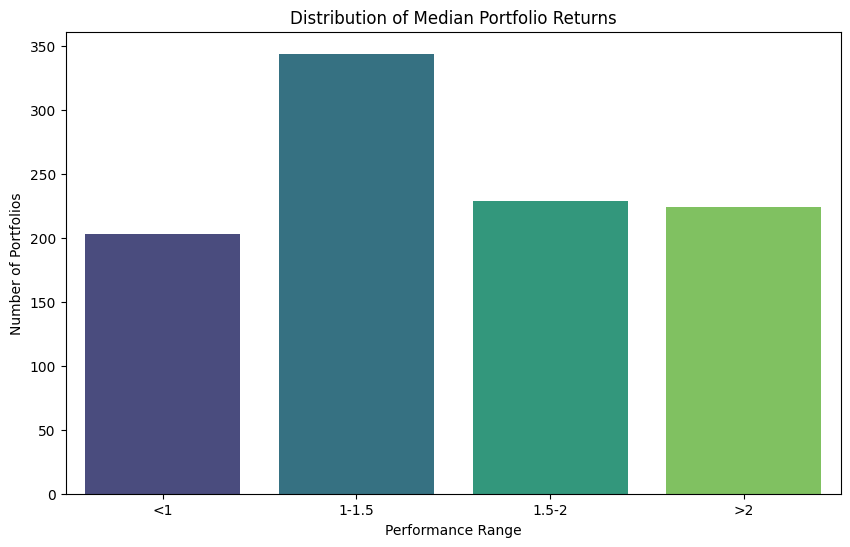

In [251]:
# Create a DataFrame to analyze portfolio performance
portfolio_df = pd.DataFrame(portfolio_median_performances, columns=['Median Portfolio Return'])

# Define performance ranges
performance_ranges = [(0, 1), (1, 1.5), (1.5, 2), (2, np.inf)]
performance_labels = ['<1', '1-1.5', '1.5-2', '>2']

# Add a new column to the DataFrame indicating the performance range
portfolio_df['Performance Range'] = pd.cut(portfolio_df['Median Portfolio Return'], bins=[0, 1, 1.5, 2, np.inf], labels=performance_labels, right=False)

# Calculate the percentage of portfolios in each performance range
percentage_performances = portfolio_df['Performance Range'].value_counts(normalize=True) * 100

# Display the table of percentages
print("Percentage of Portfolios in Each Performance Range:")
print(percentage_performances)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Performance Range', data=portfolio_df, order=performance_labels, palette="viridis")
plt.title('Distribution of Median Portfolio Returns')
plt.xlabel('Performance Range')
plt.ylabel('Number of Portfolios')
plt.show()

In [136]:
np.random.seed(1)
for _ in range(n_portfolios):
    assets = np.random.choice(returns.columns, n_assets, replace = False)         # - Choose assets randomly without replacement
    weights = np.random.rand(n_assets)
    weights /= sum(weights)                                                     # - Ensure weights sum to 1
    # -- Compute portfolio return and variance
    portfolio_E_Return = np.sum(weights * mus[assets])
    portfolio_E_Variance = np.dot(weights, np.dot(cov.loc[assets, assets], weights))
    
    annualized_return = ((1 + portfolio_E_Return / 100) ** 4) - 1               # -- Calculate annualized return
    
    annualized_volatility = np.sqrt(portfolio_E_Variance) * np.sqrt(4)          # -- Calculate annualized volatility

    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility # -- Calculate Sharpe ratio

    # -- Add the mean/variance/Shapre ratio triples to a list for plotting
    mean_variance_pairs.append([annualized_return, annualized_volatility, sharpe_ratio])
    
    # -- Append the annualized return to the list of portfolio returns
    portfolio_returns.append(annualized_return)

# -- Convert the lists from before into arrays for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)
portfolio_returns = np.array(portfolio_returns)
overall_median_return = np.median(np.array(mean_variance_pairs)[:, 0])

fig = go.Figure()
fig.add_trace(go.Scatter(x = mean_variance_pairs[:, 1] ** 0.5, y = mean_variance_pairs[:, 0],
                         marker = dict(color=(mean_variance_pairs[:, 0]) /
                                       (mean_variance_pairs[:, 1] ** 0.5), showscale = True, size = 7, line = dict(width = 1), colorscale = "RdBu",
                                     colorbar=dict(title="Sharpe<br>Ratio")), mode='markers'))
fig.update_layout(template = 'plotly_white',
                  xaxis = dict(title = 'Annualized Risk (Volatility)'),
                  yaxis = dict(title = 'Annualized Return'),
                  title ='Sample of Random Portfolios', width = 850, height = 500)
fig.update_layout(coloraxis_colorbar = dict(title="Sharpe Ratio"))
fig.show()

# Approach II

In [117]:
# Assuming your quarterly returns are in columns CQ12000 to CQ42019
returns = emerging_fms_historical.iloc[:, 8:]

# -- Get annualized mean returns
mus = (1 + returns.mean())**4 - 1

# -- Get covariances
cov = returns.cov() * 4

n_assets = 20  # 20 funds per portfolio
n_portfolios = 1000
risk_free_rate = 0.05

# -- Initialize empty lists to store mean-variance pairs and returns for plotting
mean_variance_pairs = []
portfolio_returns = []

## Copied from https://nbviewer.org/github/rian-dolphin/Efficient-Frontier-Python/blob/main/Markowitz.ipynb

In [118]:
np.random.seed(75)
for i in range(n_portfolios):
    assets = np.random.choice(list(returns.columns), n_assets, replace=False)
    weights = np.random.rand(n_assets)
    weights = weights/sum(weights)
    #-- Loop over asset pairs and compute portfolio return and variance
    #- https://quant.stackexchange.com/questions/43442/portfolio-variance-explanation-for-equation-investments-by-zvi-bodie
    portfolio_E_Variance = 0
    portfolio_E_Return = 0
    for i in range(len(assets)):
        portfolio_E_Return += weights[i] * mus.loc[assets[i]]
        for j in range(len(assets)):
            #-- Add variance/covariance for each asset pair
            #- Note that when i==j this adds the variance
            portfolio_E_Variance += weights[i] * weights[j] * cov.loc[assets[i], assets[j]]
            
    #-- Add the mean/variance pairs to a list for plotting
    mean_variance_pairs.append([portfolio_E_Return, portfolio_E_Variance])

mean_variance_pairs = np.array(mean_variance_pairs)

fig = go.Figure()
fig.add_trace(go.Scatter(x = mean_variance_pairs[:,1]**0.5, y=mean_variance_pairs[:,0], 
                      marker=dict(color = (mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, size=7, line=dict(width=1), colorscale="RdBu", colorbar=dict(title="Sharpe<br>Ratio")), 
                      mode='markers'))
fig.update_layout(template = 'plotly_white',
                  xaxis = dict(title='Annualised Risk (Volatility)'),
                  yaxis = dict(title='Annualised Return'),
                  title = 'Sample of Random Portfolios',
                  width = 850, height = 500)
fig.update_layout(coloraxis_colorbar = dict(title = "Sharpe Ratio"))

In [97]:
np.random.seed(77)
for _ in range(n_portfolios):
    assets = np.random.choice(list(returns.columns), n_assets, replace=False)
    weights = np.random.rand(n_assets)
    weights /= sum(weights)

    # Initialize portfolio_E_Return outside the inner loop
    portfolio_E_Return = 0
    for i in range(len(assets)):
        # Accumulate the returns for each asset
        portfolio_E_Return += weights[i] * mus.loc[assets[i]]

    # Initialize portfolio_E_Variance outside the inner loop
    portfolio_E_Variance = 0
    for i in range(len(assets)):
        for j in range(len(assets)):
            # Add variance/covariance for each asset pair
            # Note that when i==j this adds the variance
            portfolio_E_Variance += weights[i] * weights[j] * cov.loc[assets[i], assets[j]]
    
    annualized_return = ((1 + portfolio_E_Return / 100) ** 4) - 1      # Calculate annualized return
    
    annualized_volatility = np.sqrt(portfolio_E_Variance) * np.sqrt(4) # Calculate annualized volatility

    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility # Calculate Sharpe ratio

    # Add the mean/variance/Shapre ratio triples to a list for plotting
    mean_variance_pairs.append([annualized_return, annualized_volatility, sharpe_ratio])

# Convert the list from before into an array for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)

fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:, 1]**0.5, y=mean_variance_pairs[:, 0],
                         marker=dict(color=(mean_variance_pairs[:, 0]) /
                                       (mean_variance_pairs[:, 1]**0.5),
                                     showscale=True,
                                     size=7,
                                     line=dict(width=1),
                                     colorscale="RdBu",
                                     colorbar=dict(title="Sharpe<br>Ratio"),
                                     ),
                         mode='markers'))
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualized Risk (Volatility)'),
                  yaxis=dict(title='Annualized Return'),
                  title='Sample of Random Portfolios',
                  width=850,
                  height=500)
fig.update_layout(coloraxis_colorbar=dict(title="Sharpe Ratio"))
fig.show()

# Approach III

In [71]:
# Assuming 'returns' is your DataFrame with historical MOIC data
mus = (1 + returns.mean(axis=0)).values.reshape(-1) ** 4 - 1
# Number of simulations
num_simulations = 10000

# Number of funds in the portfolio
num_funds = 20

# Initialize arrays to store results
portfolio_returns = np.zeros(num_simulations)
portfolio_volatility = np.zeros(num_simulations)
portfolio_weights = np.zeros((num_simulations, num_funds))

# Run Monte Carlo simulations
for i in range(num_simulations):
    # Generate random weights that sum up to 1
    weights = np.random.random(num_funds)
    weights /= np.sum(weights)
    
    # Calculate portfolio returns and volatility
    portfolio_returns[i] = np.dot(weights, mus)
    portfolio_volatility[i] = np.sqrt(weights @ cov @ weights)
    
    # Save the weights for later analysis
    portfolio_weights[i, :] = weights

# Create a DataFrame to store the results
portfolio_data = pd.DataFrame({
    'Return': portfolio_returns,
    'Volatility': portfolio_volatility
})

# Add individual fund weights to the DataFrame
for i in range(num_funds):
    portfolio_data[f'Weight_Fund_{i+1}'] = portfolio_weights[:, i]

# Display the results
print(portfolio_data.head())


ValueError: shapes (20,) and (80,) not aligned: 20 (dim 0) != 80 (dim 0)

# Approach IV - Results in infinite values

In [ ]:
# Storing lists that retain returns, volatility, and weights of the Simulated portfolios
portfolio_returns = []
portfolio_volatility = []
sharpe_ratio = []
stock_weights = []
num_assets = 20
num_portfolios = 10000

# Getting the covariance matrix
quarterly_returns = emerging_fms_historical.loc[:, 'CQ12000':'CQ42019'].pct_change() # Gets a percentage change one quarter to the next
annual_returns = (quarterly_returns.mean() * 4) + 1      # Converting quarterly returns to annual returns (standardizing to a year)

# Obtaining the covariance of annual
cov_quarterly = quarterly_returns.cov() # Covariance
cov_annual = cov_quarterly*4            # Covariance Annualized
print(annual_returns)

In [19]:
np.random.seed(3)
for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.sum(weights * annual_returns[:20])  # Assuming first 20 elements of annual_returns correspond to the 20 assets
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = ((returns-1) / volatility)
    sharpe_ratio.append(sharpe)
    portfolio_returns.append(returns-1)
    portfolio_volatility.append(volatility)
    stock_weights.append(weights)

# Storing the portfolio values
portfolio = {'Returns': portfolio_returns,
             'Volatility': portfolio_volatility,
             'Sharpe Ratio': sharpe_ratio}

# Add an additional entry to the portfolio such that each indivudal weight is incorporated for its corresponding company
for counter,symbol in enumerate(ticks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)
df

ValueError: shapes (80,80) and (20,) not aligned: 80 (dim 1) != 20 (dim 0)

In [ ]:
# PLotting the efficient frontier
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')